In [4]:
from qiskit import QuantumCircuit 
from qiskit.circuit.library import PhaseGate
import numpy as np 

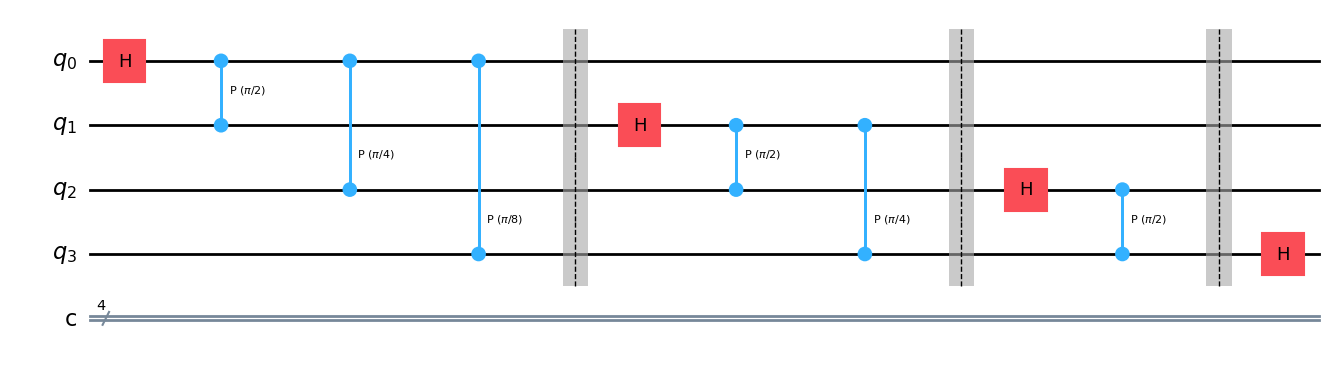

In [ ]:
# Demonstration of one-to-one case #
n = 4
qc =QuantumCircuit(n,n)

for i in range(n-1): 
    qc.h(i)
    for j in range(n-i-1):
        qc.cp(np.pi/(2**(j+1)),i, j+i+1)
    qc.barrier()

qc.h(-1)
#### qubit convention to rearange ## 
# qc.swap(0,-1)
# qc.swap(1,2) 
qc.draw('mpl', fold=-1)


In [227]:
# matrix form 
from qiskit.quantum_info import Operator
circuit_matrix = Operator(qc).to_matrix()
initial_state = np.zeros(shape=(16,1)) 
initial_state[int('0101', 2)] = 1

In [230]:
# input 0101 (inverse the input, qubit convention)
# angle => '0' = 0.0 -> 0,  '10' = 0.10 -> 1/2,  '010' = 0.010 -> 1/4, '1010' = 0.1010 -> 1/2 + 1/8 
bit_1 = (np.array([1, np.exp(1j*2*np.pi*(1/2+1/8))]))/np.sqrt(2) # last digit 
bit_2 = (np.array([1, np.exp(1j*2*np.pi*(1/4))]))/np.sqrt(2)
bit_3 = (np.array([1, np.exp(1j*2*np.pi*(1/2))]))/np.sqrt(2)
bit_4 = (np.array([1, np.exp(1j*2*np.pi*(0))]))/np.sqrt(2) # first 
product_state =  np.kron (np.kron(bit_4, bit_3), np.kron(bit_2, bit_1))

print(np.allclose(np.round(np.imag(product_state), 5),  np.round(np.imag(circuit_matrix@ initial_state).reshape(-1),5) ))
print(np.allclose(np.round(np.real(product_state), 5),  np.round(np.real(circuit_matrix@ initial_state).reshape(-1),5) ))

True
True


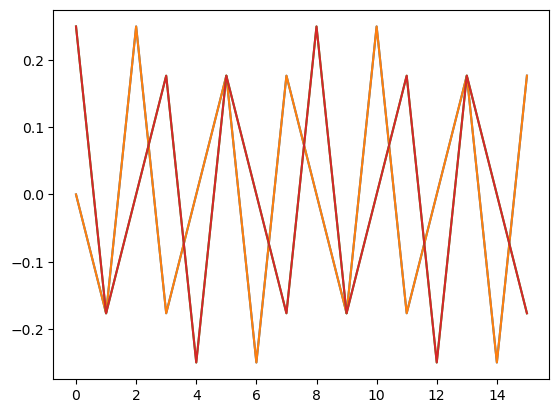

In [235]:
import matplotlib.pyplot as plt
plt.plot(np.imag(circuit_matrix@ initial_state  ))
plt.plot(np.imag(product_state))
plt.plot(np.real(circuit_matrix@ initial_state  ))
plt.plot(np.real(product_state))

In [236]:
# package version # 
import qiskit
import qiskit_ibm_runtime
import qiskit_aer
print(qiskit.__version__)
print(qiskit_ibm_runtime.__version__)
print(qiskit_aer.__version__)

2.0.0
0.38.0
0.17.0
